**CNN model for Image classification**


In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
# Download dataset from kaggle
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:48<00:00, 24.7MB/s]
100% 1.06G/1.06G [00:48<00:00, 23.4MB/s]


In [3]:
# Unzip the zip files
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [62]:
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import keras
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# We use Batch Normalization and Dropout to avoid model overfitting
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Generator(not of GAN) - As our dataset huge it creates small batches of our dataset to work

# It creates train dataset object for training with immage size at mention in the below code
train_data = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    label_mode = 'int',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256, 256)
)

# It creates test dataset object for training with immage size at mention in the below code
test_data = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    label_mode = 'int',
    labels = 'inferred',
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## **Normalization**:
##### In our train and test data all pixel values are ranges from 0 to 255 (as image size=256) but to train our model effectively we have to convert the values of pixel from 255 to in range of 0 to 1, this is called Normalization

In [8]:
# This function prcess the images and normalize the values of pixel i.e. convert it from 255 to in range of 0 and 1
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label

train_data = train_data.map(process)
test_data = test_data.map(process)

## **CNN(Convolution Neural Network) Model**

##### 32 -> number of neurons in a first layer
##### kernel -> filter size (shown in figure below)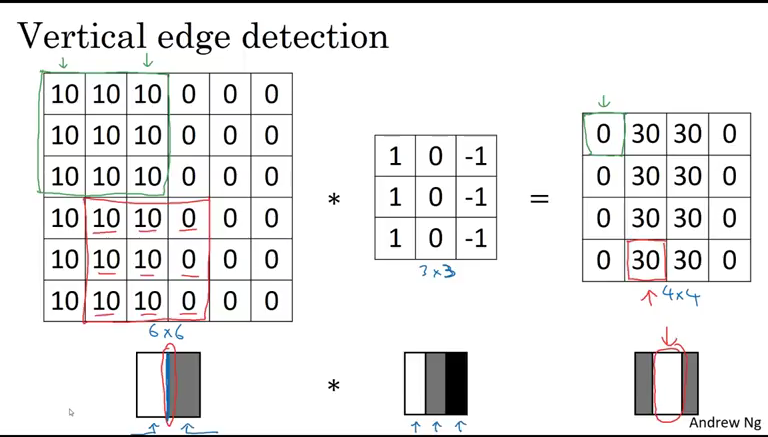

##### activation is function used to convert linear model into non-linear model.

##### refer this link for linear and non-linear data
[data type](https://www.researchgate.net/profile/Joshua-Chan-4/publication/336651720/figure/fig1/AS:827026202169345@1574189820497/Results-of-Linear-and-Nonlinear-Generated-Data-Experiments.png)

##### activation funtion refer:
[activation function link](https://www.geeksforgeeks.org/activation-functions-neural-networks/)

In [9]:
model = Sequential( [

    Conv2D(32, kernel_size = (3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(64, kernel_size = (3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Conv2D(128, kernel_size = (3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

#### **Compile model**:
##### optimizer = Adam (Adaptive Moment Estimation), it is like gradient descent just mathematical formulae are different
##### loss - it is function used to measure the difference between the actual value and predicted(output of model) value. Binary Cross Entropy is one of types of loss funtion.
##### loss = (actual value - predicted)

In [63]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

### **Train model:**


In [64]:
history = model.fit(train_data, epochs=6, validation_data=test_data)

Epoch 1/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 59s 86ms/step - accuracy: 0.9046 - loss: 0.2324 - val_accuracy: 0.8420 - val_loss: 0.4381
Epoch 2/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 87ms/step - accuracy: 0.9359 - loss: 0.1631 - val_accuracy: 0.8432 - val_loss: 0.5213
Epoch 3/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 81ms/step - accuracy: 0.9588 - loss: 0.1120 - val_accuracy: 0.8440 - val_loss: 0.5567
Epoch 4/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.9737 - loss: 0.0704 - val_accuracy: 0.8480 - val_loss: 0.6034
Epoch 5/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 87ms/step - accuracy: 0.9815 - loss: 0.0517 - val_accuracy: 0.8444 - val_loss: 0.6813
Epoch 6/6
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 84ms/step - accuracy: 0.9865 - loss: 0.0383 - val_accuracy: 0.8480 - val_loss: 0.7094


In [65]:
# Save the trained model
model.save("model.keras")

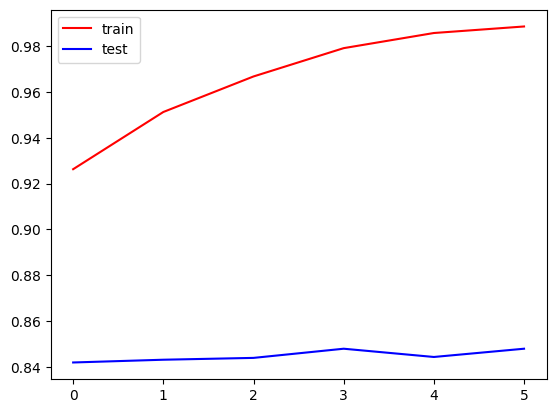

In [66]:
# # Graph between train and testing accuracy

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='test')
plt.legend()
plt.show()

##### **Overfitting of model**
##### From the above graph we can conclude that our model is overfit cause it works well on training data but fails on testing data.
##### Similarly loss for training data is decreasing with epochs but increases on testing data

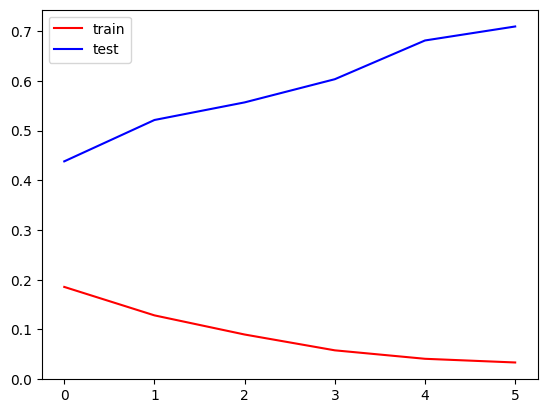

In [67]:
# Graph between train and testing loss- for good model it should be decrease

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='test')
plt.legend()
plt.show()

##### To tackle Overfitting problem we can use these techniques:
##### 1. Batch Normalization
##### 2. Early Stopping - check the improvement in model for some epochs if no improvement, stop the model
##### 3. Dropout - Randomly set a fraction of input units to 0 at each update during training time, which helps prevent overfitting.

##### This output (below) function take prediction value and tell whether image is of Dog or Cat



In [97]:
def output(prediction):
  if prediction >= 0.5:
    print('Dog')
  else:
    print("Cat")

#### **Testing** - test model on different image

In [18]:
# import openCV library to work with images
import cv2

#### Testing model on dog image

**Resize image:** As image size is less than our model require (model require-(256, 256)) so we need to resize it and
store in resize_test_img variable

**Reshape image:**  As we send data in batches (we have mentioned batch_size=32 in our network architecture) but here we have only 1 image so we have to reshape it before pass to model.
1 - specify there is only image in this batch

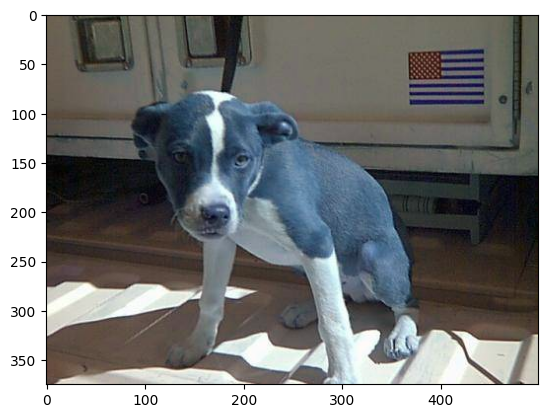

In [98]:
test_img = cv2.imread('/content/test/dogs/dog.10027.jpg')
resize_test_img = cv2.resize(test_img, (256, 256))
reshape_test_img = resize_test_img.reshape((1, 256, 256, 3))
plt.imshow(test_img)

In [99]:
prediction = model.predict(reshape_test_img)
output(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Dog


In [100]:
prediction

array([[1.]], dtype=float32)

#### Testing model on cat image

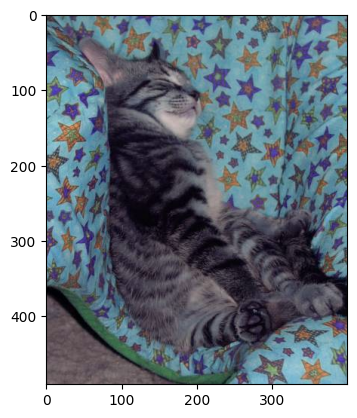

In [101]:
test_img2 = cv2.imread('/content/test/cats/cat.10026.jpg')
resize_test_img2 = cv2.resize(test_img2, (256, 256))
reshape_test_img2 = resize_test_img2.reshape((1, 256, 256, 3))
plt.imshow(test_img2)

In [102]:
prediction2 = model.predict(reshape_test_img2)
output(prediction2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Dog


In [103]:
prediction

array([[1.]], dtype=float32)